### [LPRNet: License Plate Recognition via Deep Neural Networks](https://arxiv.org/abs/1806.10447v1)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")

In [3]:
import torch

torch.cuda.is_available()

False

In [5]:
!rm ../data/plates/train/img/Unknown_*
!rm ../data/plates/val/img/Unknown_*
!rm ../data/plates/test/img/Unknown_*

rm: cannot remove '../data/plates/val/img/Unknown_*': No such file or directory
rm: cannot remove '../data/plates/test/img/Unknown_*': No such file or directory


In [6]:
import os


def rename_plates(imgsdir):
    """
    Standartize file names
    """
    for img in os.listdir(imgsdir):
        name, ext = os.path.splitext(img)
        number = name.split("-")[1] if "-" in name else name.split("_")[1] if "_" in name else ""
        number = "_" + number if number else number
        name = name.split("-")[0].split("_")[0]
        if len(name) == 8:
            new_name = name[:-2] + "0" + name[-2:] + number + ext
            os.rename(os.path.join(imgsdir, img), os.path.join(imgsdir, new_name))


rename_plates("../data/plates/train/img/")
rename_plates("../data/plates/val/img")
rename_plates("../data/plates/test/img")

In [31]:
!ls -l ../data/plates/train/img | wc -l
!ls -l ../data/plates/val/img | wc -l
!ls -l ../data/plates/test/img | wc -l

44180
4894
2846


In [78]:
!ls -l ../data/plates/train/img | head

total 1269848
-rw------- 1 338589825 1027400513  40251 Oct  5 12:03 A001AA050.png
-rw------- 1 338589825 1027400513  80233 Oct  5 12:03 A001AH199.png
-rw------- 1 338589825 1027400513  19610 Oct  5 12:03 A001AK054.png
-rw------- 1 338589825 1027400513  25547 Oct  5 12:03 A001AO164.png
-rw------- 1 338589825 1027400513  34102 Oct  5 12:03 A001AO777.png
-rw------- 1 338589825 1027400513  43543 Oct  5 12:03 A001AY064.png
-rw------- 1 338589825 1027400513  41825 Oct  5 12:03 A001AY123.png
-rw------- 1 338589825 1027400513  32606 Oct  5 12:03 A001BA178.png
-rw------- 1 338589825 1027400513  33894 Oct  5 12:03 A001BB154.png
ls: write error: Broken pipe


In [9]:
import os

(max(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/train/img")),
 max(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/val/img")),
 max(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/test/img")))

(11, 11, 11)

In [10]:
(min(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/train/img")),
 min(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/val/img")),
 min(len(os.path.splitext(el)[0]) for el in os.listdir("../data/plates/test/img")))

(9, 9, 9)

In [11]:
def show_all_chars(imgdirs):
    res = set()
    for imgdir in imgdirs:
        imgs = os.listdir(imgdir)
        for img in imgs:
            basename = os.path.basename(img)
            imgname, suffix = os.path.splitext(basename)
            imgname = imgname.split("-")[0].split("_")[0]
            res |= set(imgname)
    return res


res = show_all_chars(["../data/plates/train/img", "../data/plates/val/img", "../data/plates/test/img"])
print(len(res))
res

22


{'0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'E',
 'H',
 'K',
 'M',
 'O',
 'P',
 'T',
 'X',
 'Y'}

### Training

In [84]:
import os
import glob

from src.train_lrpnet import train


def clean_prev_weights(weights_dir="../weights/*"):
    files = glob.glob(weights_dir)
    for f in files:
        os.remove(f)


clean = True
if clean:
    clean_prev_weights()

train("../src/configs/train.yml")

Successful to build network!
Initial net weights successful!
Epoch:1 || epochiter: 0/345|| Total iter 0 || Loss: 43.6279||LR: 0.00100000
Epoch:1 || epochiter: 20/345|| Total iter 20 || Loss: 4.3859||LR: 0.00100000
Epoch:1 || epochiter: 40/345|| Total iter 40 || Loss: 4.1267||LR: 0.00100000
Epoch:1 || epochiter: 60/345|| Total iter 60 || Loss: 3.3153||LR: 0.00100000
Epoch:1 || epochiter: 80/345|| Total iter 80 || Loss: 3.0952||LR: 0.00100000
Epoch:1 || epochiter: 100/345|| Total iter 100 || Loss: 3.1022||LR: 0.00100000
Epoch:1 || epochiter: 120/345|| Total iter 120 || Loss: 3.0861||LR: 0.00100000
Epoch:1 || epochiter: 140/345|| Total iter 140 || Loss: 3.0498||LR: 0.00100000
Epoch:1 || epochiter: 160/345|| Total iter 160 || Loss: 2.9136||LR: 0.00100000
Epoch:1 || epochiter: 180/345|| Total iter 180 || Loss: 2.8989||LR: 0.00100000
Epoch:1 || epochiter: 200/345|| Total iter 200 || Loss: 2.9226||LR: 0.00100000
Epoch:1 || epochiter: 220/345|| Total iter 220 || Loss: 2.9022||LR: 0.00100000
Ep

Epoch:6 || epochiter: 275/345|| Total iter 2000 || Loss: 0.1300||LR: 0.00010000
Epoch:6 || epochiter: 295/345|| Total iter 2020 || Loss: 0.0853||LR: 0.00010000
Epoch:6 || epochiter: 315/345|| Total iter 2040 || Loss: 0.0132||LR: 0.00010000
Epoch:6 || epochiter: 335/345|| Total iter 2060 || Loss: -0.0002||LR: 0.00010000
Epoch:7 || epochiter: 10/345|| Total iter 2080 || Loss: -0.0185||LR: 0.00010000
Epoch:7 || epochiter: 30/345|| Total iter 2100 || Loss: -0.0035||LR: 0.00010000
Epoch:7 || epochiter: 50/345|| Total iter 2120 || Loss: -0.0075||LR: 0.00010000
Epoch:7 || epochiter: 70/345|| Total iter 2140 || Loss: 0.0689||LR: 0.00010000
Epoch:7 || epochiter: 90/345|| Total iter 2160 || Loss: -0.0057||LR: 0.00010000
Epoch:7 || epochiter: 110/345|| Total iter 2180 || Loss: 0.0958||LR: 0.00010000
Epoch:7 || epochiter: 130/345|| Total iter 2200 || Loss: -0.0015||LR: 0.00010000
Epoch:7 || epochiter: 150/345|| Total iter 2220 || Loss: 0.0208||LR: 0.00010000
Epoch:7 || epochiter: 170/345|| Total i

[Info] Test Accuracy: 0.7384868421052632 [3592:1156:116:4864]
Epoch:12 || epochiter: 205/345|| Total iter 4000 || Loss: -0.0082||LR: 0.00000100
Epoch:12 || epochiter: 225/345|| Total iter 4020 || Loss: 0.0709||LR: 0.00000100
Epoch:12 || epochiter: 245/345|| Total iter 4040 || Loss: 0.0164||LR: 0.00000100
Epoch:12 || epochiter: 265/345|| Total iter 4060 || Loss: 0.0536||LR: 0.00000100
Epoch:12 || epochiter: 285/345|| Total iter 4080 || Loss: 0.0796||LR: 0.00000100
Epoch:12 || epochiter: 305/345|| Total iter 4100 || Loss: 0.0783||LR: 0.00000100
Epoch:12 || epochiter: 325/345|| Total iter 4120 || Loss: 0.0670||LR: 0.00000100
Epoch:13 || epochiter: 0/345|| Total iter 4140 || Loss: 0.0974||LR: 0.00000100
Epoch:13 || epochiter: 20/345|| Total iter 4160 || Loss: 0.0218||LR: 0.00000100
Epoch:13 || epochiter: 40/345|| Total iter 4180 || Loss: -0.0293||LR: 0.00000100
Epoch:13 || epochiter: 60/345|| Total iter 4200 || Loss: -0.0146||LR: 0.00000100
Epoch:13 || epochiter: 80/345|| Total iter 4220 |

### Testing

In [10]:
import os
from yaml import load, Loader

import torch

from src.models.lprnet import build_lprnet
from src.train_lrpnet import get_acc
from src.models.load_data import CHARS, LPRDataset


with open("../src/configs/train.yml", "r") as f:
    args = load(f, Loader=Loader)


def test_acc(dataset, model):
    lprnet = build_lprnet(lpr_max_len=args["lpr_max_len"],
                          phase=args["phase_train"],
                          class_num=len(CHARS),
                          dropout_rate=args["dropout_rate"])
    device = torch.device("cuda:0" if args["cuda"] else "cpu")
    lprnet.to(device)
    
    lprnet.load_state_dict(torch.load(model))
    
    test_img_dirs = os.path.expanduser(dataset)
    test_dataset = LPRDataset(test_img_dirs.split(","), args["img_size"], args["lpr_max_len"])
    
    get_acc(lprnet, test_dataset, args)

In [90]:
test_acc("../data/plates/test/img", "../weights/Final_LPRNet_model.pth")

[Info] Test Accuracy: 0.7233664772727273 [2037:685:94:2816]


### Examples

In [13]:
from src.models.recognizer import PlateRecognizer


model = PlateRecognizer("../weights/Final_LPRNet_model.pth", "../src/configs/train.yml")

In [14]:
from os import listdir
from pathlib import Path
from random import sample

import cv2
import matplotlib.pyplot as plt

%matplotlib inline


def examples(model, data: str, n: int = 15):
    data = Path(data)
    files = listdir(data)
    for imgfile in sample(files, n):
        img = cv2.imread(str(data / imgfile))
        res = model(img)
        plt.axis("off")
        plt.title(res)
        plt.imshow(img)
        plt.show()

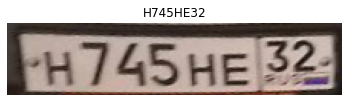

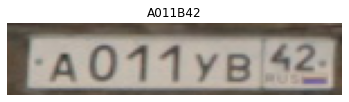

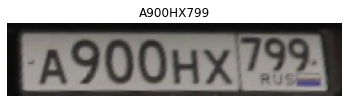

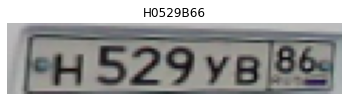

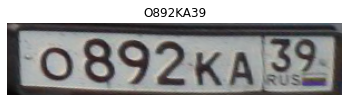

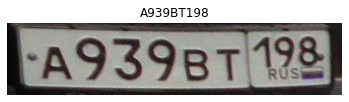

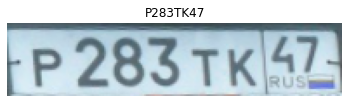

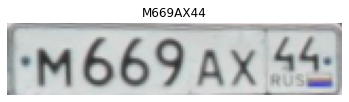

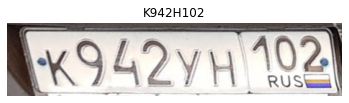

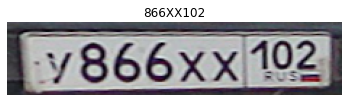

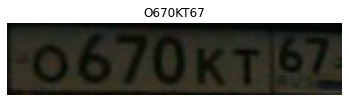

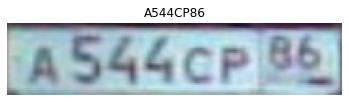

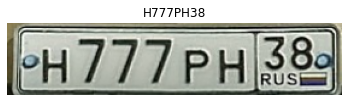

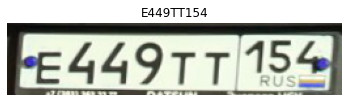

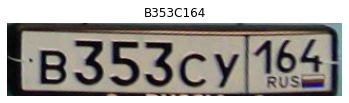

In [16]:
examples(model, "../data/plates/test/img", 15)